In [19]:
import pandas as pd
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import numpy as np
import joblib

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/muhamadluthfireynaldi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords and lowercase the tokens
    stop_words = set(stopwords.words('indonesian'))
    tokens = [token.lower() for token in tokens if token.lower() not in stop_words]
    
    # Lemmatize the tokens using Sasstrawi
    stemmer = StemmerFactory().create_stemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    
    # Join the tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

In [21]:
df_clean = pd.read_csv('../../dataset/df_cleaned_final.csv')

In [22]:
df_clean

,title,price,sold,location,link,category_link,preprocessed_text
0,basreng sultan bandung 1kg viral tiktok pedas ...,35.000,10RB+ Terjual,KAB. BANDUNG,https://shopee.co.id/basreng-sultan-bandung-1k...,https://shopee.co.id/Makanan-Minuman-cat.11043451,basreng sultan bandung kg viral tiktok pedas d...
1,Grandville Abon Original / abon anak No MSG ha...,37.500,10RB+ Terjual,KOTA DEPOK,https://shopee.co.id/Grandville-Abon-Original-...,https://shopee.co.id/Makanan-Minuman-cat.11043451,grandville abon original abon anak no msg hala...
2,MINYAK GORENG SUNCO 500 ML,9.900,10RB+ Terjual,KOTA DEPOK,https://shopee.co.id/MINYAK-GORENG-SUNCO-500-M...,https://shopee.co.id/Makanan-Minuman-cat.11043451,minyak goreng sunco ml
3,BASRENG ORIGINAL MURAH VIRAL TIKTOK PEDAS DAUN...,19.999,10RB+ Terjual,KAB. MOJOKERTO,https://shopee.co.id/BASRENG-ORIGINAL-MURAH-VI...,https://shopee.co.id/Makanan-Minuman-cat.11043451,basreng original murah viral tiktok pedas daun...
4,Basreng Stik Pedas Daun Jeruk 1kg,30.000,10RB+ Terjual,KAB. BANDUNG,https://shopee.co.id/Basreng-Stik-Pedas-Daun-J...,https://shopee.co.id/Makanan-Minuman-cat.11043451,basreng stik pedas daun jeruk kg
...,...,...,...,...,...,...,...
8857,"Ginseng ejiao dangshen dihuang,penambah trombo...",216.000,"1,1RB Terjual",KOTA SURABAYA,https://shopee.co.id/Ginseng-ejiao-dangshen-di...,NaN,ginseng ejiao dangshen dihuangpenambah trombos...
8858,mister golo/golo ginseng/mister golo gingseng ...,59.000,92 Terjual,KOTA JAKARTA TIMUR,https://shopee.co.id/mister-golo-golo-ginseng-...,NaN,mister gologolo ginsengmister golo gingseng su...
8859,Kopi Obat Kuat Pria Tahan Lama BIGMAXX Stamina...,120,NaN,KAB. SUMEDANG,https://shopee.co.id/Kopi-Obat-Kuat-Pria-Tahan...,NaN,kopi obat kuat pria tahan bigmaxx stamina extr...
8860,Dijamin Paksu nya Greng 4-G Joss Asli Original...,85.000,NaN,KOTA SEMARANG,https://shopee.co.id/Dijamin-Paksu-nya-Greng-4...,NaN,jamin paksu nya greng g joss asli original ban...


In [23]:
# Define the regular expression pattern
pattern = ['gram', 'ml', 'kg', 'cuci', 'gudang', 'gr', 'isi', 'pcs', 'ternak', 'dus', 'premium']

# Use regular expressions to remove special characters from the 'text' column
df_clean['preprocessed_text_ed'] = df_clean['preprocessed_text'].replace(pattern, '', regex=True)

In [24]:
df_clean.head()

,title,price,sold,location,link,category_link,preprocessed_text,preprocessed_text_ed
0,basreng sultan bandung 1kg viral tiktok pedas ...,35.000,10RB+ Terjual,KAB. BANDUNG,https://shopee.co.id/basreng-sultan-bandung-1k...,https://shopee.co.id/Makanan-Minuman-cat.11043451,basreng sultan bandung kg viral tiktok pedas d...,basreng sultan bandung viral tiktok pedas dau...
1,Grandville Abon Original / abon anak No MSG ha...,37.500,10RB+ Terjual,KOTA DEPOK,https://shopee.co.id/Grandville-Abon-Original-...,https://shopee.co.id/Makanan-Minuman-cat.11043451,grandville abon original abon anak no msg hala...,andville abon original abon anak no msg halal ...
2,MINYAK GORENG SUNCO 500 ML,9.900,10RB+ Terjual,KOTA DEPOK,https://shopee.co.id/MINYAK-GORENG-SUNCO-500-M...,https://shopee.co.id/Makanan-Minuman-cat.11043451,minyak goreng sunco ml,minyak goreng sunco
3,BASRENG ORIGINAL MURAH VIRAL TIKTOK PEDAS DAUN...,19.999,10RB+ Terjual,KAB. MOJOKERTO,https://shopee.co.id/BASRENG-ORIGINAL-MURAH-VI...,https://shopee.co.id/Makanan-Minuman-cat.11043451,basreng original murah viral tiktok pedas daun...,basreng original murah viral tiktok pedas daun...
4,Basreng Stik Pedas Daun Jeruk 1kg,30.000,10RB+ Terjual,KAB. BANDUNG,https://shopee.co.id/Basreng-Stik-Pedas-Daun-J...,https://shopee.co.id/Makanan-Minuman-cat.11043451,basreng stik pedas daun jeruk kg,basreng stik pedas daun jeruk


In [25]:
vectorizer = joblib.load("vectorizer.joblib")

In [26]:
df_clean['preprocessed_text_ed'].fillna('', inplace=True)

In [27]:
X_tfidf_pred = vectorizer.transform(df_clean['preprocessed_text_ed'])

In [28]:
X_tfidf_pred

<8862x2820 sparse matrix of type '<class 'numpy.float64'>'
	with 55182 stored elements in Compressed Sparse Row format>

In [29]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 

In [32]:
f = 'ID_CRM_FIN-NULL_NONE_PN_Launch_NON TRX_MT_NLM_GNR_NI_NULL_NULL_Cashloan_Awareness_Exp_Treatment_24042024_P0'

In [39]:
f[37:43]

'X_MT_N'

In [30]:
def tf_idf_titles(df, gram):
    X = df['preprocessed_text_ed']
    tfidf_vectorizer = TfidfVectorizer(ngram_range = (gram,gram))
    X_tfidf = tfidf_vectorizer.fit_transform(X)
    term_frequencies = X_tfidf.sum(axis=0)
    feature_names = tfidf_vectorizer.get_feature_names_out()
    
    return X_tfidf, term_frequencies, feature_names

def keywords_plot(X_tfidf, term_frequencies, feature_names):
    frequencies = term_frequencies.A1
    freq_list = list(zip(feature_names, frequencies))
    freq_list = sorted(freq_list, key=lambda x: x[1], reverse=True)

    top_n = 20 
    top_terms = freq_list[:top_n]

    plt.figure(figsize=(10, 6))
    terms, frequencies = zip(*top_terms)
    plt.bar(range(len(terms)), frequencies, align='center', alpha=0.8)
    plt.xticks(range(len(terms)), terms, rotation=45, ha='right')
    plt.ylabel('Frequency')
    plt.xlabel('Keywords')
    plt.title('Top {} Keywords by Frequency'.format(top_n))
    
    return plt, term_frequencies,

In [31]:
X_tfidf, term_frequencies, feature_names = tf_idf_titles(df_clean, 3)
plt = keywords_plot(X_tfidf, term_frequencies, feature_names)

AttributeError: 'tuple' object has no attribute 'figure'

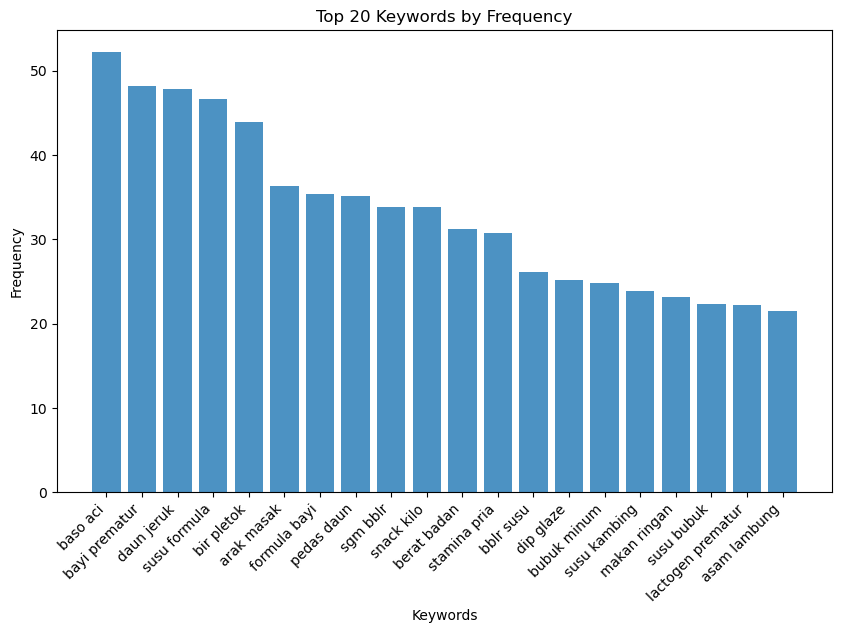

In [71]:
X_tfidf, term_frequencies, feature_names = tf_idf_titles(df_clean, 2)
plt = keywords_plot(X_tfidf, term_frequencies, feature_names)

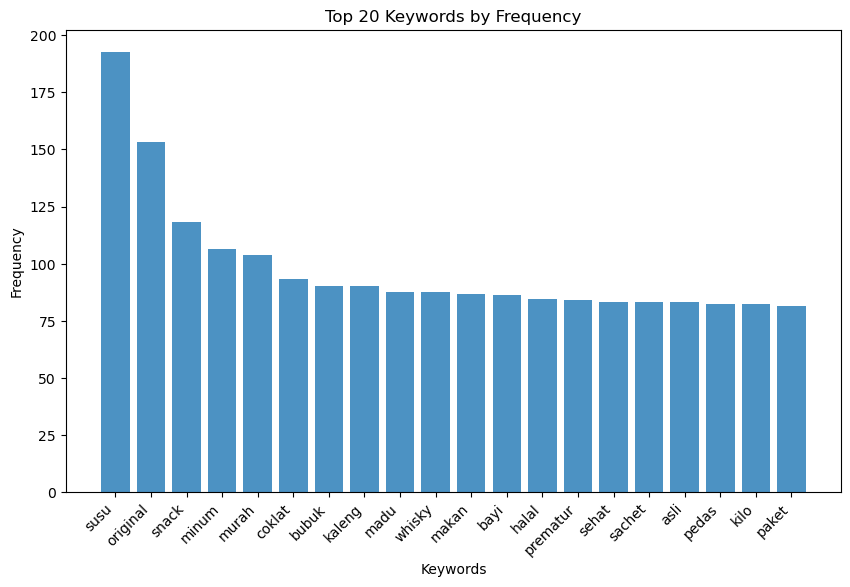

In [72]:
X_tfidf, term_frequencies, feature_names = tf_idf_titles(df_clean, 1)
plt = keywords_plot(X_tfidf, term_frequencies, feature_names)

In [14]:
import matplotlib.pyplot as plt


In [54]:
frequencies = term_frequencies.A1

In [55]:
term_frequencies.max()

1008

In [57]:
frequencies.min()

1

In [35]:
freq_list = list(zip(feature_names, frequencies))
freq_list = sorted(freq_list, key=lambda x: x[1], reverse=True)

In [36]:
freq_list

[('susu', 192.7417393346643),
 ('original', 153.3651480715941),
 ('snack', 117.99915746053858),
 ('minum', 106.44337142243715),
 ('murah', 103.55367953344239),
 ('coklat', 93.06136994390138),
 ('bubuk', 90.00915287403426),
 ('kaleng', 89.99146841254066),
 ('madu', 87.76776836644001),
 ('whisky', 87.76277071369499),
 ('makan', 86.7073865231994),
 ('bayi', 86.30164673439057),
 ('halal', 84.51992522976884),
 ('prematur', 83.8649280720138),
 ('sehat', 83.11636210951032),
 ('sachet', 83.05058801595257),
 ('asli', 82.95116828086536),
 ('pedas', 82.23541646124778),
 ('kilo', 82.11499262635145),
 ('paket', 81.48256924718278),
 ('ayam', 81.43130866851612),
 ('basreng', 77.03682773243982),
 ('daun', 74.89518419276085),
 ('arak', 73.04508661754521),
 ('baso', 72.52498622683139),
 ('box', 71.2539444574143),
 ('instan', 70.1556585080409),
 ('kopi', 69.90992056197298),
 ('bir', 69.05465731375693),
 ('pria', 68.4561749663263),
 ('bumbu', 68.30058669918861),
 ('jeruk', 67.80392073432544),
 ('aci', 67.

In [40]:
import numpy as np
import scipy.sparse as sp
import implicit

In [52]:
user_item = np.array([
    [5, 4, 0, 0],  # User 1 ratings for movies [1, 2]
    [0, 0, 3, 2],  # User 2 ratings for movies [3, 4]
    [1, 0, 0, 4]   # User 3 ratings for movies [1, 4]
])

# Define labels for movies (genre and rating)
# For simplicity, we'll use one-hot encoding
# Genre: Action=0, Comedy=1, Drama=2
# Rating: 1 Star=0, 2 Stars=1, 3 Stars=2, 4 Stars=3, 5 Stars=4
movie_genre_labels = np.array([
    [1, 0, 0],  # Movie 1 is Action
    [0, 1, 0],  # Movie 2 is Comedy
    [0, 0, 1],  # Movie 3 is Drama
    [1, 0, 0]   # Movie 4 is Action
])

movie_rating_labels = np.array([
    [0, 0, 0, 0, 1],  # Movie 1 is rated 5 Stars
    [0, 0, 0, 1, 0],  # Movie 2 is rated 4 Stars
    [0, 0, 1, 0, 0],  # Movie 3 is rated 3 Stars
    [0, 0, 0, 1, 0]   # Movie 4 is rated 4 Stars
])

In [53]:
# Concatenate labels to create feature matrix
movie_features = np.concatenate([movie_genre_labels, movie_rating_labels], axis=1)

# Convert user-item interaction to sparse matrix format
user_item_sparse = sp.csr_matrix(user_item)

In [54]:
movie_features

array([[1, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 0]])

In [55]:
user_item_sparse

<3x4 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [56]:
# Create ALS model
model = implicit.als.AlternatingLeastSquares(factors=50)

# Train the model
model.fit(user_item_sparse)

# Get user and item factors
user_factors = model.user_factors
item_factors = model.item_factors

  0%|          | 0/15 [00:00<?, ?it/s]

In [57]:
user_factors

array([[ 5.28003037e-01,  3.06123286e-01,  1.76070392e-01,
         2.88389653e-01,  3.66633415e-01,  9.66221213e-01,
        -1.73762329e-02,  1.71329930e-01,  5.87940097e-01,
         5.09877563e-01,  5.77211261e-01, -4.20446366e-01,
         7.79079497e-01,  8.24860692e-01,  1.26467597e+00,
         8.40586066e-01,  8.79755020e-01,  1.71783701e-01,
        -8.42474867e-03,  4.03186262e-01,  1.08107224e-01,
         3.46332192e-01,  1.63799956e-01,  2.30390832e-01,
        -3.92809957e-01,  1.08237112e+00,  3.28236103e-01,
         2.98138320e-01,  1.30870807e+00,  8.39056075e-01,
         4.87035632e-01,  7.93391943e-01,  8.04979384e-01,
         8.60829055e-01, -5.39930388e-02,  8.24873507e-01,
         3.98105919e-01,  7.82229900e-01,  6.38165057e-01,
         3.41638386e-01,  6.54572248e-01,  6.17698161e-03,
        -5.09647012e-01,  1.17184423e-01,  7.57756352e-01,
         6.29470885e-01,  1.85344219e-01,  1.03800762e+00,
         1.10354230e-01,  7.63055861e-01],
       [ 3.35

In [58]:
item_factors

array([[ 0.11576656,  0.08491197,  0.08009966, -0.045975  ,  0.01794722,
        -0.01415771, -0.04872708, -0.04274293,  0.06151759,  0.01699329,
        -0.0362214 , -0.07524893,  0.09728947,  0.01167359,  0.05453112,
         0.01743365,  0.05089728, -0.00688968, -0.04422702,  0.0347602 ,
         0.04836254,  0.02189022,  0.00526352, -0.01932091, -0.06844211,
         0.10308482,  0.0391994 ,  0.0235126 ,  0.04457588,  0.05327608,
         0.0114709 , -0.010949  , -0.01097436,  0.1133492 ,  0.04174325,
        -0.0224833 ,  0.06447126,  0.06659079, -0.01615039,  0.05210318,
         0.08297089, -0.0661687 , -0.04216833, -0.00154493,  0.06538952,
         0.05933125, -0.00945119,  0.01285542,  0.02516067,  0.06002905],
       [ 0.00110614, -0.00486677, -0.01282981,  0.03015712,  0.0177446 ,
         0.06996766,  0.00968999,  0.02090309,  0.01990649,  0.0295694 ,
         0.04730262, -0.01122608,  0.02549256,  0.05401421,  0.07193813,
         0.05069094,  0.04482785,  0.01064071,  0.

In [59]:
# Make recommendations for user 1
user_id = 0
user_ratings = user_item_sparse[user_id]
# Create a separate sparse matrix containing only data for the target user
user_item_sparse_target = user_item_sparse[user_id]
recommendations = model.recommend(user_id, user_item_sparse_target, N=2)

print("Recommendations for User 1:")
for movie_id, score in recommendations:
    print("Movie ID:", movie_id + 1, "Score:", score)

Recommendations for User 1:
Movie ID: 4 Score: 2
Movie ID: 1.000155227346113 Score: -0.0001682921


In [62]:
import numpy as np
import scipy.sparse as sp
import implicit

# Example data: user-item interactions with two labels (genre and rating)
# Each row represents a user, each column represents a movie
# Values represent user ratings
user_item = np.array([
    [5, 4, 0, 0],  # User 1 ratings for movies [1, 2]
    [0, 0, 3, 2],  # User 2 ratings for movies [3, 4]
    [1, 0, 0, 4]   # User 3 ratings for movies [1, 4]
])

# Define labels for movies (genre and rating)
# For simplicity, we'll use one-hot encoding
# Genre: Action=0, Comedy=1, Drama=2
# Rating: 1 Star=0, 2 Stars=1, 3 Stars=2, 4 Stars=3, 5 Stars=4
movie_genre_labels = np.array([
    [1, 0, 0],  # Movie 1 is Action
    [0, 1, 0],  # Movie 2 is Comedy
    [0, 0, 1],  # Movie 3 is Drama
    [1, 0, 0]   # Movie 4 is Action
])

movie_rating_labels = np.array([
    [0, 0, 0, 0, 1],  # Movie 1 is rated 5 Stars
    [0, 0, 0, 1, 0],  # Movie 2 is rated 4 Stars
    [0, 0, 1, 0, 0],  # Movie 3 is rated 3 Stars
    [0, 0, 0, 1, 0]   # Movie 4 is rated 4 Stars
])

# Concatenate labels to create feature matrix
movie_features = np.concatenate([movie_genre_labels, movie_rating_labels], axis=1)

# Convert user-item interaction to sparse matrix format
user_item_sparse = sp.csr_matrix(user_item)

# Create ALS model
model = implicit.als.AlternatingLeastSquares(factors=50)

# Train the model
model.fit(user_item_sparse)

# Get user and item factors
user_factors = model.user_factors
item_factors = model.item_factors

# Mapping between internal movie IDs and original movie IDs
movie_id_map = {i: i + 1 for i in range(len(movie_genre_labels))}

# Make recommendations for user 1


  0%|          | 0/15 [00:00<?, ?it/s]

Recommendations for User 1:
Movie ID: 4 Score: 2
Movie ID: 1 Score: -0.00016998644


In [66]:
user_id = 2
user_ratings = user_item_sparse[user_id]
# Create a separate sparse matrix containing only data for the target user
user_item_sparse_target = user_item_sparse[user_id]
recommendations = model.recommend(user_id, user_item_sparse_target, N=2)

print("Recommendations for User 1:")
for movie_id, score in recommendations:
    original_movie_id = movie_id_map[int(round(movie_id))]
    print("Movie ID:", original_movie_id, "Score:", score)

Recommendations for User 1:
Movie ID: 3 Score: 1
Movie ID: 1 Score: 0.00032753192
